In [ ]:
# import the important libraries
import pandas as pd
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [ ]:
# import the dataset
dataset = pd.read_csv('restaurants-challenge.csv', header=None)
dataset.head()

,0,1,2
0,BROOKLYN,Chinese,Z
1,MANHATTAN,American,C
2,BRONX,Chicken,C
3,MANHATTAN,American,A
4,MANHATTAN,American,A


In [ ]:
# data inspection
dataset.shape

(179731, 3)

In [ ]:
#transaction list
transactions = []
for i in range (0, 179730):
    transactions.append([str(dataset.values[i,j])
                         for j  in range (0,3)])
transactions[0:5]

[[' BROOKLYN ', ' Chinese ', ' Z'],
 [' MANHATTAN ', ' American ', ' C'],
 [' BRONX ', ' Chicken ', ' C'],
 [' MANHATTAN ', ' American ', ' A'],
 [' MANHATTAN ', ' American ', ' A']]

In [ ]:
#Encode the transactions
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_transactions = te.fit_transform(transactions)
te_transactions

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
te.columns_

[' A',
 ' Afghan ',
 ' African ',
 ' American ',
 ' Armenian ',
 ' Asian ',
 ' Australian ',
 ' B',
 ' BRONX ',
 ' BROOKLYN ',
 ' Bagels/Pretzels ',
 ' Bakery ',
 ' Bangladeshi ',
 ' Barbecue ',
 ' Bottled beverages including water sodas juices etc. ',
 ' Brazilian ',
 ' C',
 ' Cafe/Coffee/Tea ',
 ' Cajun ',
 ' Caribbean ',
 ' Chicken ',
 ' Chinese ',
 ' Chinese/Cuban ',
 ' Chinese/Japanese ',
 ' Continental ',
 ' Creole ',
 ' Creole/Cajun ',
 ' Czech ',
 ' Delicatessen ',
 ' Donuts ',
 ' Eastern European ',
 ' Egyptian ',
 ' English ',
 ' Ethiopian ',
 ' Filipino ',
 ' French ',
 ' Fruits/Vegetables ',
 ' German ',
 ' Greek ',
 ' Hamburgers ',
 ' Hawaiian ',
 ' Hotdogs ',
 ' Hotdogs/Pretzels ',
 ' Ice Cream Gelato Yogurt Ices ',
 ' Indian ',
 ' Indonesian ',
 ' Iranian ',
 ' Irish ',
 ' Italian ',
 ' Japanese ',
 ' Jewish/Kosher ',
 ' Juice Smoothies Fruit Salads ',
 ' Korean ',
 ' Latin (Cuban Dominican Puerto Rican South & Central American) ',
 ' MANHATTAN ',
 ' Mediterranean ',
 ' 

In [ ]:
df = pd.DataFrame(te_transactions,
                  columns = te.columns_)
df.head()

,A,Afghan,African,American,Armenian,Asian,Australian,B,BRONX,BROOKLYN,...,Southwestern,Spanish,Steak,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia,Z
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Association Rule LEarning
model = apriori(df, min_support =0.02, use_colnames = True)
results = association_rules(model, 
                            metric = "confidence", 
                            min_threshold = 0.5)
results.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,( Italian ),( MANHATTAN ),0.047672,0.412647,0.029394,0.616597,1.494248,0.009723,1.531946
3,( Cafe/Coffee/Tea ),( A),0.032120,0.513081,0.022016,0.685432,1.335915,0.005536,1.547899
8,( American ),( MANHATTAN ),0.239164,0.412647,0.129867,0.543003,1.315904,0.031177,1.285246
14,"( American , B)",( MANHATTAN ),0.061208,0.412647,0.033228,0.542860,1.315556,0.007970,1.284843
12,"( American , A)",( MANHATTAN ),0.134402,0.412647,0.072642,0.540487,1.309805,0.017182,1.278208
7,( STATENISLAND ),( A),0.032326,0.513081,0.021026,0.650430,1.267696,0.004440,1.392910
0,( American ),( A),0.239164,0.513081,0.134402,0.561963,1.095273,0.011691,1.111595
11,"( American , MANHATTAN )",( A),0.129867,0.513081,0.072642,0.559359,1.090197,0.006010,1.105025
10,"( BROOKLYN , American )",( A),0.045329,0.513081,0.025238,0.556769,1.085150,0.001980,1.098569
13,"( American , QUEENS )",( A),0.040071,0.513081,0.022000,0.549014,1.070035,0.001440,1.079678


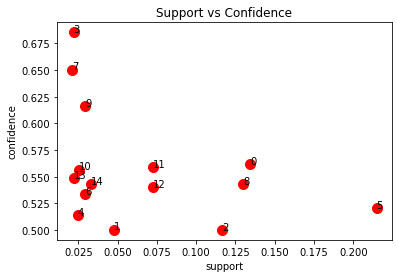

In [ ]:
#visualization
import matplotlib.pyplot as plt
plt.scatter(results['support'], 
            results['confidence'],
            s = 100,
            color = 'red')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
for i, label in enumerate(results.index):
    plt.annotate(label, (results['support'][i], 
                         results['confidence'][i]))
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f63b8785-e613-4a9f-a28e-9f6d391c4ebc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>